A partir de una tabla de datos ya procesada para utilizar con los modelos teoricos, 
en este nb buscamos optimizar

In [6]:
## seteamos los parametros del notebook
%autosave 180

import pandas as pd; 
import numpy as np; 
import os;
import random;
import time
#%matplotlib inline
import sys

np.random.seed(2015)
rootdir=os.getcwd()
rootdir+= "/datasets"
os.chdir(rootdir)

Autosaving every 180 seconds


In [8]:
#from unbalanced_dataset import UnderSampler, NearMiss, CondensedNearestNeighbour, OneSidedSelection,\
#NeighbourhoodCleaningRule, TomekLinks, ClusterCentroids, OverSampler, SMOTE,\
#SMOTETomek, SMOTEENN, EasyEnsemble, BalanceCascade

In [8]:
ls *.gz

ground_truth.csv.gz  sf_output.txt.gz  sl_output.txt.gz


In [11]:
!zcat ground_truth.csv.gz| head

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
USER|ANTENNA_ID|EPIDEMIC|EXPOSED
FFFF51FDDD55A2E24D074DE30C4798E9|470|0|0
FFFC3133FAEF588B9FA75487C864F774|1036|0|1
FFFB2F18F4CCF253C06B581EA518A7A5|497|1|1
FFFB2C0FEE677EE733DDD85F11C5A14C|214|0|1
FFFB27D77413E57C38D14D876C3DE8CF|2946|0|1
FFFA0736F66FB09200CE1D13E081A946|15|1|1
FFF976C823C8ACDE846E68DF75F4D698|792|1|1
FFF8ECD2969C8CD09D164D67F9BA206A|884|0|1
FFF8373FC0468150A4B6460E6F1A3768|2297|1|1

gzip: stdout: Broken pipe


In [12]:
file_sf = "sf_output.txt.gz"
file_sl = "sl_output.txt.gz"
file_gt = "ground_truth.csv.gz"

sf_table = pd.read_csv(file_sf,sep = ",",
                   header =0,
                     index_col =0)
sl_table = pd.read_csv(file_sl,sep = "|",
                   header =0,
                     index_col =0)
gt_table = pd.read_csv(file_gt,sep = "|",
                   header =0,
                     index_col =0)

#agrego la etiqueta "_gt" a las columnas del ground_truth
gt_table.columns = [col+"_gt" for col in gt_table.columns]

In [20]:
sf_table.shape, sl_table.shape, gt_table.shape

((3667451, 23), (2449242, 15), (2000285, 3))

In [21]:
#checking table consistency
np.in1d(gt_table.index.values,sf_table.index.values).sum()

2000285

In [22]:
np.in1d(gt_table.index.values,sl_table.index.values).sum()

2000285

In [13]:
sf_table.head()

,EXPOSED,ANTENNA_ID_0,COUNT_0,ANTENNA_ID_1,COUNT_1,ANTENNA_ID_2,COUNT_2,ANTENNA_ID_3,COUNT_3,ANTENNA_ID_4,...,ANTENNA_ID_6,COUNT_6,ANTENNA_ID_7,COUNT_7,ANTENNA_ID_8,COUNT_8,ANTENNA_ID_9,COUNT_9,EPIDEMIC,MOBILITY_DIAMETER
USER,,,,,,,,,,,,,,,,,,,,,
FFFF78CB080636632B2D1DE7A7BFAB03,False,3415,21,2969,5,1320,3,2471,3,1115,...,-1,65535,-1,65535,-1,65535,-1,65535,False,1063.140535
FFFF51FDDD55A2E24D074DE30C4798E9,True,1207,15,1171,14,1820,9,583,8,2026,...,1831,4,1625,2,401,1,825,1,False,520.065959
FFFE1EDDA25369CBC467536FA6A787FD,True,1847,22,1753,14,1422,11,1028,10,765,...,862,8,2463,7,1416,6,871,5,True,989.597851
FFFD0A912A959CDFCFFAB2F93BFBA435,True,1407,18,1702,8,1613,6,1704,5,1394,...,818,2,958,2,726,1,848,1,False,490.585382
FFFCB235D6D917DDF350F5B11CCB0EE8,True,17,74,174,33,1123,4,1178,4,173,...,503,1,1039,1,1228,1,1327,1,True,1613.225606


In [19]:
sl_table.head()

,CallsWeekDaylight,CallsWeekDaylight_EPI,CallsWeekNight,CallsWeekNight_EPI,CallsWeekend,CallsWeekend_EPI,TimeWeekDaylight,TimeWeekDaylight_EPI,TimeWeekNight,TimeWeekNight_EPI,TimeWeekend,TimeWeekend_EPI,TOTAL_USERS,EPI_USERS,EXP_USERS
LineKeyOrigin,,,,,,,,,,,,,,,
000004F96010462FA7A71C7784E27476,0,0,0,0,0,1,0,0,0,0,0,34,1,0,1
000007EEE7895E17937CFF86379C8E17,0,2,0,0,0,0,0,144,0,0,0,0,1,1,1
00000837B868F926F67BD440A0845C1D,1,0,2,4,3,0,47,0,74,86,109,0,3,0,2
00000C5D3BFBEBD919F6F68386C3DD5E,4,0,0,0,0,0,281,0,0,0,0,0,1,0,1
0000129F4191FFD0963774D2307C7510,2,0,0,0,0,0,66,0,0,0,0,0,2,0,2


In [25]:
gt_table.head()

,ANTENNA_ID_gt,EPIDEMIC_gt,EXPOSED_gt
USER,,,
FFFF51FDDD55A2E24D074DE30C4798E9,470,0,0
FFFC3133FAEF588B9FA75487C864F774,1036,0,1
FFFB2F18F4CCF253C06B581EA518A7A5,497,1,1
FFFB2C0FEE677EE733DDD85F11C5A14C,214,0,1
FFFB27D77413E57C38D14D876C3DE8CF,2946,0,1


In [26]:
# para poder usar el estimador MultionmialNB, paso todos los valores negativos en las antenna_ids de sf_table a 0
for col in [col for col in sf_table.columns.values if "_ID" in col]:
    sf_table[col] = sf_table[col].replace(-1,0)

In [29]:
X_table = pd.concat([gt_table,sf_table, sl_table], axis=1, join='inner')
X_table.shape

(2000285, 41)

## Choosing different fitting objectives
We have enough information to attack the following questions:
* Predict if user A used to be exposed.
* Predict if user A used to be epidemic.
* Predict if user A used to have Antenna N as a base one. (antenna number has to be given and given that we have more than 4500 antenna, classes will be EXTREMELY unbalanced in this scenario )

In [34]:
X_table.head()

,ANTENNA_ID_gt,EPIDEMIC_gt,EXPOSED_gt,EXPOSED,ANTENNA_ID_0,COUNT_0,ANTENNA_ID_1,COUNT_1,ANTENNA_ID_2,COUNT_2,...,CallsWeekend_EPI,TimeWeekDaylight,TimeWeekDaylight_EPI,TimeWeekNight,TimeWeekNight_EPI,TimeWeekend,TimeWeekend_EPI,TOTAL_USERS,EPI_USERS,EXP_USERS
000004F96010462FA7A71C7784E27476,3471,1,1,True,2937,36,1787,22,3314,19,...,1,0,0,0,0,0,34,1,0,1
000007EEE7895E17937CFF86379C8E17,952,1,1,True,625,6,33,5,1915,5,...,0,0,144,0,0,0,0,1,1,1
00000837B868F926F67BD440A0845C1D,2836,1,1,True,650,102,1955,48,1915,26,...,0,47,0,74,86,109,0,3,0,2
00000C5D3BFBEBD919F6F68386C3DD5E,3785,0,1,False,1325,3,2699,1,3227,1,...,0,281,0,0,0,0,0,1,0,1
0000129F4191FFD0963774D2307C7510,415,0,1,True,2226,18,306,12,891,11,...,0,66,0,0,0,0,0,2,0,2


In [38]:
X = X_table[[col for col in X_table if not("_gt" in col)]].values

gt = "EPIDEMIC_gt"
#exp_gt = True
#ant_gt = 

y = X_table[gt].values.flatten()

## Scikit estimator fit and cross-validation

In [36]:
from sklearn.naive_bayes import *
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.svm import *
from sklearn.neural_network import *
from sklearn.cross_validation import *
from sklearn.multiclass import OneVsRestClassifier
from sklearn.utils import *
from sklearn.preprocessing import label_binarize, scale, StandardScaler
from sklearn.metrics import *
from sklearn.ensemble import *
from sklearn.tree import *
from sklearn.grid_search import *
from sklearn.pipeline import Pipeline

In [39]:
#elegimos algunas variantes del dataset original
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

perc = 0.2
mini_ind = np.random.choice(X_train.shape[0],int(perc*X_train.shape[0]),replace=False)
X_mini =  X_train[mini_ind,:]
y_mini = y_train[mini_ind]

In [14]:
## seteo los generalizadores de CV
##genero los estimadores
W = np.array([15 if i == 1 else 1 for i in y])
#model = GradientBoostingClassifier()

gradboost = GradientBoostingClassifier( loss = 'deviance',n_estimators=20, 
                                       max_depth = 20
                                 )
svc = LinearSVC(C=2.0, tol = 1e-4,
                class_weight = 'balanced'
               )

svc2 = SVC(C=2.0, kernel = 'rbf' ,decision_function_shape='ovr',tol = 1e-5,
                class_weight = 'balanced', max_iter = 1000
               )


# Multinomial Naive Bayes - Benchmark - Cross Validation
mnb es bastante rapido y eficiente para rapidamente resultados en problemas de clasificacion supervisada

In [47]:
start_time = time.time()
param_grid = {'alpha':[0,0.5,1.0, 1e-1,1e-2,1e1], 'fit_prior': [True,False],
             }
estimator  = MultinomialNB( )

clf =GridSearchCV(estimator, param_grid, scoring='f1', fit_params=None, n_jobs=10, iid=True, refit=True, 
verbose=3, pre_dispatch='2*n_jobs', error_score='raise')
n_iter_search =60

#how many parameters to randomly search for
n_iter_search = 45

#clf = RandomizedSearchCV(estimator, param_distributions=param_grid,
#                                   n_iter=n_iter_search, n_jobs =-1, verbose=3)


#X = X_train_categorical
clf.fit(X_train,y_train)


#random_search.fit(X_train,y_train)
elapsed_time =  time.time() - start_time

print('Random Search took %s seconds to run' % elapsed_time)


all_time =   time.time() - start_time 
print('Grid Search took %s seconds to run' % (all_time - elapsed_time))



predicted_proba = pd.DataFrame()
predicted_proba['prob'] = clf.predict_proba(X_test).max(axis=1)
predicted_proba['class'] = clf.predict(X_test)
predicted_proba[gt] =  y_test
predicted_proba.sort_values(by = 'prob',ascending = False, inplace = True)

cut_percentages = [10,20,30,40]
#converted = (predicted_proba['class']==1)
#me fijo todos los users que van a convertir en el futuro


start = 0
converted_dict = {}
ind_segments = []
for i in cut_percentages:
    cut_size = int(len(predicted_proba)*i/100.0)    
    bool_array = (~np.ones(len(predicted_proba), dtype=bool))
    bool_array[start: start + cut_size] = True
    ind_segments += [bool_array]
    start = start + cut_size
#    subtable = 
    #converted_dict[str(i)] = predicted_proba.loc[ind_segments[-1],'ref_hash']
    
    print(classification_report(predicted_proba.loc[ind_segments[-1],gt].values,
                            predicted_proba.loc[ind_segments[-1],'class'].values ))
    
    
print(classification_report(predicted_proba.loc[:,gt].values,
                            predicted_proba.loc[:,'class'].values ))
    
    
cv_result = pd.DataFrame(columns=['mean_score' ] + [key for key, value in clf.grid_scores_[0].parameters.items() ] )
i=0
for setup in clf.grid_scores_:
    row = [clf.grid_scores_[i].mean_validation_score ] + [value for key, value in clf.grid_scores_[i].parameters.items() ]
    cv_result.loc[i] = row
    i+=1
#este flag es basicamente para chequear que hayamos terminado nomas
finished = True

all_time =   time.time() - start_time

#este flag es basicamente para chequear que hayamos terminado nomas
finished = True

print('This cell took %s seconds to run' % all_time)



Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] alpha=0, fit_prior=True .........................................
[CV] ................ alpha=0, fit_prior=True, score=0.505480 -   7.6s
[CV] alpha=0, fit_prior=True .........................................
[CV] ................ alpha=0, fit_prior=True, score=0.500965 -   7.7s
[CV] alpha=0, fit_prior=True .........................................
[CV] ................ alpha=0, fit_prior=True, score=0.505311 -   7.6s
[CV] alpha=0, fit_prior=False ........................................
[CV] ............... alpha=0, fit_prior=False, score=0.505498 -   7.5s
[CV] alpha=0, fit_prior=False ........................................
[CV] ............... alpha=0, fit_prior=False, score=0.500967 -   7.5s
[CV] alpha=0, fit_prior=False ........................................
[CV] ............... alpha=0, fit_prior=False, score=0.505320 -   7.7s
[CV] alpha=0.5, fit_prior=True .......................................
[CV] ...........

[Parallel(n_jobs=10)]: Done  31 tasks       | elapsed:  4.3min
[Parallel(n_jobs=10)]: Done  36 out of  36 | elapsed:  5.0min finished



Random Search took 306.483228922 seconds to run
Grid Search took 0.000793218612671 seconds to run
             precision    recall  f1-score   support

          0       0.64      0.24      0.35     41568
          1       0.37      0.77      0.50     24441

avg / total       0.54      0.43      0.40     66009

             precision    recall  f1-score   support

          0       0.64      0.24      0.34     83362
          1       0.37      0.77      0.50     48657

avg / total       0.54      0.43      0.40    132019

             precision    recall  f1-score   support

          0       0.64      0.24      0.35    124460
          1       0.37      0.77      0.50     73568

avg / total       0.54      0.44      0.40    198028

             precision    recall  f1-score   support

          0       0.64      0.24      0.35    166086
          1       0.37      0.77      0.50     97952

avg / total       0.54      0.44      0.41    264038

             precision    recall  f1-scor

# Results
* fitting prior has better mean and almost same std
* alpha should be only > 0. But difference between positive alphas is negligible, even on different exponential orders
* 

## Logistic Regression cross validation

In [54]:

clf =  LogisticRegressionCV(n_jobs =3, class_weight= 'balanced', scoring = 'f1',cv=3)

clf.fit(X_train,y_train)


predicted_proba = pd.DataFrame()
predicted_proba['prob'] = clf.predict_proba(X_test).max(axis=1)
predicted_proba['class'] = clf.predict(X_test)
predicted_proba[gt] =  y_test
predicted_proba.sort_values(by = 'prob',ascending = False, inplace = True)

cut_percentages = [10,20,30,40]
#converted = (predicted_proba['class']==1)
#me fijo todos los users que van a convertir en el futuro


start = 0
converted_dict = {}
ind_segments = []
for i in cut_percentages:
    cut_size = int(len(predicted_proba)*i/100.0)    
    bool_array = (~np.ones(len(predicted_proba), dtype=bool))
    bool_array[start: start + cut_size] = True
    ind_segments += [bool_array]
    start = start + cut_size
#    subtable = 
    #converted_dict[str(i)] = predicted_proba.loc[ind_segments[-1],'ref_hash']
    
    print(classification_report(predicted_proba.loc[ind_segments[-1],gt].values,
                            predicted_proba.loc[ind_segments[-1],'class'].values ))
    
    
print(classification_report(predicted_proba.loc[:,gt].values,
                            predicted_proba.loc[:,'class'].values ))
    
    
cv_result = pd.DataFrame(columns=['mean_score' ] + [key for key, value in clf.grid_scores_[0].parameters.items() ] )
i=0
for setup in clf.grid_scores_:
    row = [clf.grid_scores_[i].mean_validation_score ] + [value for key, value in clf.grid_scores_[i].parameters.items() ]
    cv_result.loc[i] = row
    i+=1
#este flag es basicamente para chequear que hayamos terminado nomas
finished = True

all_time =   time.time() - start_time

#este flag es basicamente para chequear que hayamos terminado nomas
finished = True

print('This cell took %s seconds to run' % all_time)


             precision    recall  f1-score   support

          0       0.67      0.85      0.75     43545
          1       0.40      0.19      0.25     22464

avg / total       0.58      0.63      0.58     66009

             precision    recall  f1-score   support

          0       0.64      0.75      0.69     83353
          1       0.40      0.28      0.33     48666

avg / total       0.55      0.58      0.56    132019

             precision    recall  f1-score   support

          0       0.63      0.67      0.65    124185
          1       0.39      0.35      0.37     73843

avg / total       0.54      0.55      0.55    198028

             precision    recall  f1-score   support

          0       0.62      0.56      0.59    164393
          1       0.38      0.44      0.41     99645

avg / total       0.53      0.52      0.52    264038

             precision    recall  f1-score   support

          0       0.64      0.66      0.65    415477
          1       0.39      0.36 

AttributeError: 'LogisticRegressionCV' object has no attribute 'grid_scores_'

## Cross Validate SGD

In [ ]:
param_grid = [
  { 'alpha': [1e-3,5*1e-3,1e-2], 'l1_ratio': [3*1e-2,1e-3,6*1e-4], 'n_iter': [2,3]
  }
    ]

In [37]:
start_time = time.time()

param_grid = [
  { 'alpha': [1e-3,5*1e-3,1e-2], 'l1_ratio': [3*1e-2,1e-3,6*1e-4], 'n_iter': [2,3]
  }
    ]
sgd = SGDClassifier(loss='modified_huber', penalty='elasticnet', 
             fit_intercept=True,  shuffle=True, 
                    n_jobs=3,learning_rate='optimal', power_t =2, eta0 =5,
                    class_weight='balanced', average=40)

clf =GridSearchCV(sgd, param_grid, scoring='f1', fit_params=None, n_jobs=4, iid=True, refit=True, 
verbose=3, pre_dispatch='2*n_jobs', error_score='raise')

clf.fit(X_train,y_train)



predicted_proba = pd.DataFrame()
predicted_proba['prob'] = clf.predict_proba(X_test).max(axis=1)
predicted_proba['class'] = clf.predict(X_test)
predicted_proba[gt] =  y_test
predicted_proba.sort_values(by = 'prob',ascending = False, inplace = True)

cut_percentages = [10,20,30,40]
#converted = (predicted_proba['class']==1)
#me fijo todos los users que van a convertir en el futuro


start = 0
converted_dict = {}
ind_segments = []
for i in cut_percentages:
    cut_size = int(len(predicted_proba)*i/100.0)    
    bool_array = (~np.ones(len(predicted_proba), dtype=bool))
    bool_array[start: start + cut_size] = True
    ind_segments += [bool_array]
    start = start + cut_size
#    subtable = 
    #converted_dict[str(i)] = predicted_proba.loc[ind_segments[-1],'ref_hash']
    
    print(classification_report(predicted_proba.loc[ind_segments[-1],gt].values,
                            predicted_proba.loc[ind_segments[-1],'class'].values ))
    
    
print(classification_report(predicted_proba.loc[:,gt].values,
                            predicted_proba.loc[:,'class'].values ))
    
    
cv_result = pd.DataFrame(columns=['mean_score' ] + [key for key, value in clf.grid_scores_[0].parameters.items() ] )
i=0
for setup in clf.grid_scores_:
    row = [clf.grid_scores_[i].mean_validation_score ] + [value for key, value in clf.grid_scores_[i].parameters.items() ]
    cv_result.loc[i] = row
    i+=1
#este flag es basicamente para chequear que hayamos terminado nomas
finished = True

all_time =   time.time() - start_time

#este flag es basicamente para chequear que hayamos terminado nomas
finished = True

print('This cell took %s seconds to run' % all_time)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] n_iter=2, alpha=0.001, l1_ratio=0.03 ............................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] n_iter=2, alpha=0.001, l1_ratio=0.03 ............................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] ... n_iter=2, alpha=0.001, l1_ratio=0.03, score=0.125354 -   2.5s
[CV] n_iter=2, alpha=0.001, l1_ratio=0.03 ............................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] ... n_iter=2, alpha=0.001, l1_ratio=0.03, score=0.127442 -   2.5s
[CV] n_iter=3, alpha=0.001, l1_ratio=0.03 ............................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] ... n_iter=2, alpha=0.001, l1_ratio=0.03, score=0.119463 -   2.5s
[CV] n_iter=3, alpha=0.001, l1_ratio=0.03 ............................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] ... n_iter=3, alpha=0.001, l1_ratio=0.03, score=0.132910 -   3.1s
[CV] n_iter=3, alpha=0.001, l1_ratio=0.03 ............................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] ... n_iter=3, alpha=0.001, l1_ratio=0.03, score=0.133858 -   3.1s
[CV] n_iter=2, alpha=0.001, l1_ratio=0.001 ...........................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] ... n_iter=3, alpha=0.001, l1_ratio=0.03, score=0.125862 -   3.1s
[CV] n_iter=2, alpha=0.001, l1_ratio=0.001 ...........................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] .. n_iter=2, alpha=0.001, l1_ratio=0.001, score=0.114065 -   2.5s
[CV] n_iter=2, alpha=0.001, l1_ratio=0.001 ...........................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] .. n_iter=2, alpha=0.001, l1_ratio=0.001, score=0.125576 -   2.5s
[CV] n_iter=3, alpha=0.001, l1_ratio=0.001 ...........................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] .. n_iter=2, alpha=0.001, l1_ratio=0.001, score=0.125882 -   2.8s
[CV] n_iter=3, alpha=0.001, l1_ratio=0.001 ...........................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] .. n_iter=3, alpha=0.001, l1_ratio=0.001, score=0.138072 -   3.3s
[CV] n_iter=3, alpha=0.001, l1_ratio=0.001 ...........................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] .. n_iter=3, alpha=0.001, l1_ratio=0.001, score=0.133482 -   3.1s
[CV] n_iter=2, alpha=0.001, l1_ratio=0.0006000000000000001 ...........


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] .. n_iter=3, alpha=0.001, l1_ratio=0.001, score=0.133945 -   3.2s
[CV] n_iter=2, alpha=0.001, l1_ratio=0.0006000000000000001 ...........


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  n_iter=2, alpha=0.001, l1_ratio=0.0006000000000000001, score=0.124318 -   2.5s
[CV] n_iter=2, alpha=0.001, l1_ratio=0.0006000000000000001 ...........


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  n_iter=2, alpha=0.001, l1_ratio=0.0006000000000000001, score=0.125224 -   2.5s
[CV] n_iter=3, alpha=0.001, l1_ratio=0.0006000000000000001 ...........


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  n_iter=2, alpha=0.001, l1_ratio=0.0006000000000000001, score=0.129423 -   2.5s
[CV] n_iter=3, alpha=0.001, l1_ratio=0.0006000000000000001 ...........


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  n_iter=3, alpha=0.001, l1_ratio=0.0006000000000000001, score=0.131845 -   3.1s
[CV] n_iter=3, alpha=0.001, l1_ratio=0.0006000000000000001 ...........


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  n_iter=3, alpha=0.001, l1_ratio=0.0006000000000000001, score=0.135827 -   3.1s
[CV] n_iter=2, alpha=0.005, l1_ratio=0.03 ............................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  n_iter=3, alpha=0.001, l1_ratio=0.0006000000000000001, score=0.128485 -   3.1s
[CV] n_iter=2, alpha=0.005, l1_ratio=0.03 ............................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] ... n_iter=2, alpha=0.005, l1_ratio=0.03, score=0.125477 -   2.4s
[CV] n_iter=2, alpha=0.005, l1_ratio=0.03 ............................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] ... n_iter=2, alpha=0.005, l1_ratio=0.03, score=0.125957 -   2.8s
[CV] n_iter=3, alpha=0.005, l1_ratio=0.03 ............................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] ... n_iter=2, alpha=0.005, l1_ratio=0.03, score=0.127511 -   2.6s
[CV] n_iter=3, alpha=0.005, l1_ratio=0.03 ............................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] ... n_iter=3, alpha=0.005, l1_ratio=0.03, score=0.127618 -   2.8s
[CV] n_iter=3, alpha=0.005, l1_ratio=0.03 ............................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] ... n_iter=3, alpha=0.005, l1_ratio=0.03, score=0.125386 -   2.8s
[CV] n_iter=2, alpha=0.005, l1_ratio=0.001 ...........................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] ... n_iter=3, alpha=0.005, l1_ratio=0.03, score=0.136983 -   3.0s


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   47.9s


[CV] n_iter=2, alpha=0.005, l1_ratio=0.001 ...........................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] .. n_iter=2, alpha=0.005, l1_ratio=0.001, score=0.120290 -   2.5s
[CV] n_iter=2, alpha=0.005, l1_ratio=0.001 ...........................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] .. n_iter=2, alpha=0.005, l1_ratio=0.001, score=0.118753 -   2.5s
[CV] n_iter=3, alpha=0.005, l1_ratio=0.001 ...........................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] .. n_iter=2, alpha=0.005, l1_ratio=0.001, score=0.127159 -   2.9s
[CV] n_iter=3, alpha=0.005, l1_ratio=0.001 ...........................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] .. n_iter=3, alpha=0.005, l1_ratio=0.001, score=0.127485 -   3.3s
[CV] n_iter=3, alpha=0.005, l1_ratio=0.001 ...........................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] .. n_iter=3, alpha=0.005, l1_ratio=0.001, score=0.139728 -   3.1s
[CV] n_iter=2, alpha=0.005, l1_ratio=0.0006000000000000001 ...........


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] .. n_iter=3, alpha=0.005, l1_ratio=0.001, score=0.130469 -   3.1s
[CV] n_iter=2, alpha=0.005, l1_ratio=0.0006000000000000001 ...........


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  n_iter=2, alpha=0.005, l1_ratio=0.0006000000000000001, score=0.129161 -   2.5s
[CV] n_iter=2, alpha=0.005, l1_ratio=0.0006000000000000001 ...........


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  n_iter=2, alpha=0.005, l1_ratio=0.0006000000000000001, score=0.130159 -   2.5s
[CV] n_iter=3, alpha=0.005, l1_ratio=0.0006000000000000001 ...........


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  n_iter=2, alpha=0.005, l1_ratio=0.0006000000000000001, score=0.127613 -   2.5s
[CV] n_iter=3, alpha=0.005, l1_ratio=0.0006000000000000001 ...........


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  n_iter=3, alpha=0.005, l1_ratio=0.0006000000000000001, score=0.132956 -   3.1s
[CV] n_iter=3, alpha=0.005, l1_ratio=0.0006000000000000001 ...........


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  n_iter=3, alpha=0.005, l1_ratio=0.0006000000000000001, score=0.143005 -   3.1s
[CV] n_iter=2, alpha=0.01, l1_ratio=0.03 .............................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  n_iter=3, alpha=0.005, l1_ratio=0.0006000000000000001, score=0.135926 -   3.1s
[CV] n_iter=2, alpha=0.01, l1_ratio=0.03 .............................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] .... n_iter=2, alpha=0.01, l1_ratio=0.03, score=0.128098 -   2.4s
[CV] n_iter=2, alpha=0.01, l1_ratio=0.03 .............................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] .... n_iter=2, alpha=0.01, l1_ratio=0.03, score=0.127078 -   2.7s
[CV] n_iter=3, alpha=0.01, l1_ratio=0.03 .............................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] .... n_iter=2, alpha=0.01, l1_ratio=0.03, score=0.126921 -   2.5s
[CV] n_iter=3, alpha=0.01, l1_ratio=0.03 .............................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] .... n_iter=3, alpha=0.01, l1_ratio=0.03, score=0.138152 -   3.6s
[CV] n_iter=3, alpha=0.01, l1_ratio=0.03 .............................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] .... n_iter=3, alpha=0.01, l1_ratio=0.03, score=0.106208 -   3.1s
[CV] n_iter=2, alpha=0.01, l1_ratio=0.001 ............................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] .... n_iter=3, alpha=0.01, l1_ratio=0.03, score=0.143076 -   2.8s
[CV] n_iter=2, alpha=0.01, l1_ratio=0.001 ............................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] ... n_iter=2, alpha=0.01, l1_ratio=0.001, score=0.132427 -   2.5s
[CV] n_iter=2, alpha=0.01, l1_ratio=0.001 ............................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] ... n_iter=2, alpha=0.01, l1_ratio=0.001, score=0.125901 -   2.9s
[CV] n_iter=3, alpha=0.01, l1_ratio=0.001 ............................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] ... n_iter=2, alpha=0.01, l1_ratio=0.001, score=0.128001 -   2.7s
[CV] n_iter=3, alpha=0.01, l1_ratio=0.001 ............................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] ... n_iter=3, alpha=0.01, l1_ratio=0.001, score=0.135568 -   3.1s
[CV] n_iter=3, alpha=0.01, l1_ratio=0.001 ............................


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] n_iter=2, alpha=0.01, l1_ratio=0.0006000000000000001 ............


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] ... n_iter=3, alpha=0.01, l1_ratio=0.001, score=0.132579 -   4.4s
[CV] ... n_iter=3, alpha=0.01, l1_ratio=0.001, score=0.136589 -   3.7s
[CV] n_iter=2, alpha=0.01, l1_ratio=0.0006000000000000001 ............


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  n_iter=2, alpha=0.01, l1_ratio=0.0006000000000000001, score=0.124134 -   2.8s
[CV] n_iter=2, alpha=0.01, l1_ratio=0.0006000000000000001 ............


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  n_iter=2, alpha=0.01, l1_ratio=0.0006000000000000001, score=0.130883 -   2.5s
[CV] n_iter=3, alpha=0.01, l1_ratio=0.0006000000000000001 ............


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  n_iter=2, alpha=0.01, l1_ratio=0.0006000000000000001, score=0.122741 -   3.5s
[CV] n_iter=3, alpha=0.01, l1_ratio=0.0006000000000000001 ............


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  n_iter=3, alpha=0.01, l1_ratio=0.0006000000000000001, score=0.132433 -   3.7s
[CV] n_iter=3, alpha=0.01, l1_ratio=0.0006000000000000001 ............
[CV]  n_iter=3, alpha=0.01, l1_ratio=0.0006000000000000001, score=0.135111 -   3.4s
[CV]  n_iter=3, alpha=0.01, l1_ratio=0.0006000000000000001, score=0.135908 -   3.1s


[Parallel(n_jobs=4)]: Done  54 out of  54 | elapsed:  1.7min finished


             precision    recall  f1-score   support

          0       1.00      0.31      0.47    355992
          1       0.06      0.99      0.11     15152

avg / total       0.96      0.33      0.45    371144

This cell took 108.56432461738586 seconds to run


In [ ]:
threshold = 0.7
ind = predicted_proba['prob']>threshold
print(classification_report(predicted_proba.loc[ind,'y'].values,predicted_proba.loc[ind,'class'].values ))

In [38]:
clf.best_estimator_

SGDClassifier(alpha=0.005, average=40, class_weight='balanced', epsilon=0.1,
       eta0=5, fit_intercept=True, l1_ratio=0.0006000000000000001,
       learning_rate='optimal', loss='modified_huber', n_iter=3, n_jobs=3,
       penalty='elasticnet', power_t=2, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [39]:
coln=1
print(cv_result.groupby(cv_result.columns[coln])['mean_score'].mean())
print(cv_result.groupby(cv_result.columns[coln])['mean_score'].std())

n_iter
2.0    0.125741
3.0    0.132943
Name: mean_score, dtype: float64
n_iter
2.0    0.002609
3.0    0.002703
Name: mean_score, dtype: float64


### Results
* l1_ratio = cuanto mas chico mejor con lo cual la perdida l2 parece ser mejor
* alpha = 1e-3 es suficiente pues casi no afecta el score
* power_t = muy variado, no parece haber correlacion entre el tamanyo y el avg, mean_score
* eta0 = no afecta mucho pero parece ser que con ser >1 ya esta
* power_t = parecen ser practicamente iguales
* n_iter = cuanto mas iter NO mejora el score

In [51]:
len(predicted_proba)

371161

## Cross Validate NN

In [35]:
start_time = time.time()

X_train,X_test,y_train ,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

param_grid = { 'alpha': [1e-1,5*1e-2,1e-2],
              'hidden_layer_sizes':[(50,),(15,5)],
              'learning_rate': ['adaptive',"invscaling"],
              "algorithm": ['adam'],'momentum': [1e-2, 1e-1, 0.5],
  'power_t': [1e-3, 5*1e-4, 1e-5], 'activation':['logistic','relu']
 }

mlp = MLPClassifier(shuffle=True, 
                 verbose=True)

clf =GridSearchCV(mlp, param_grid, scoring='f1', fit_params=None, n_jobs=4, iid=True, refit=True, 
verbose=3, pre_dispatch='2*n_jobs', error_score='raise')

clf.fit(X_train,y_train)

predicted_proba = pd.DataFrame()
predicted_proba['prob'] = clf.predict_proba(X_test).max(axis=1)
predicted_proba['gt'] = y_test
predicted_proba['class'] = clf.predict(X_test)

threshold = 0.7
ind = predicted_proba['prob']>threshold

all_time =   time.time() - start_time

print(classification_report(predicted_proba.loc[ind,'gt'].values,predicted_proba.loc[ind,'class'].values ))

cv_result = pd.DataFrame(columns=['mean_score' ] + [key for key, value in clf.grid_scores_[0].parameters.items() ] )
i=0
for setup in clf.grid_scores_:
    row = [clf.grid_scores_[i].mean_validation_score ] + [value for key, value in clf.grid_scores_[i].parameters.items() ]
    cv_result.loc[i] = row
    i+=1
#este flag es basicamente para chequear que hayamos terminado nomas
finished = True

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] algorithm=adam, hidden_layer_sizes=(50,), activation=logistic, power_t=0.001, alpha=0.1, learning_rate=adaptive 
[CV] algorithm=adam, hidden_layer_sizes=(50,), activation=logistic, power_t=0.001, alpha=0.1, learning_rate=adaptive 
[CV] algorithm=adam, hidden_layer_sizes=(50,), activation=logistic, power_t=0.001, alpha=0.1, learning_rate=adaptive 
[CV] algorithm=adam, hidden_layer_sizes=(50,), activation=logistic, power_t=0.0005, alpha=0.1, learning_rate=adaptive 
Iteration 1, loss = 0.20405210
Iteration 1, loss = 0.20380843
Iteration 1, loss = 0.20378706
Iteration 1, loss = 0.20405210


/home/teo/Repositories/scikit-learn/sklearn/metrics/classification.py:1097: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  algorithm=adam, hidden_layer_sizes=(50,), activation=logistic, power_t=0.0005, alpha=0.1, learning_rate=adaptive, score=0.000000 -   1.5s
[CV] algorithm=adam, hidden_layer_sizes=(50,), activation=logistic, power_t=0.0005, alpha=0.1, learning_rate=adaptive 


/home/teo/Repositories/scikit-learn/sklearn/metrics/classification.py:1097: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  algorithm=adam, hidden_layer_sizes=(50,), activation=logistic, power_t=0.001, alpha=0.1, learning_rate=adaptive, score=0.000000 -   1.7s


/home/teo/Repositories/scikit-learn/sklearn/metrics/classification.py:1097: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  algorithm=adam, hidden_layer_sizes=(50,), activation=logistic, power_t=0.001, alpha=0.1, learning_rate=adaptive, score=0.000000 -   2.1s


/home/teo/Repositories/scikit-learn/sklearn/metrics/classification.py:1097: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  algorithm=adam, hidden_layer_sizes=(50,), activation=logistic, power_t=0.001, alpha=0.1, learning_rate=adaptive, score=0.000000 -   1.9s


KeyboardInterrupt: 

In [1]:
clf.best_estimator_

NameError: name 'clf' is not defined

In [52]:
# compare best parameters to tune
coln=1
cv_result.groupby(cv_result.columns[coln])['mean_score'].mean()
cv_result.groupby(cv_result.columns[coln])['mean_score'].std()

alpha
0.00     0.000007
0.01     0.000007
0.10     0.000007
0.50     0.000007
1.00     0.000007
10.00    0.000007
Name: mean_score, dtype: float64

### Results
* activation = logistic es 10% mejor
* alpha = 1e-2 el mejor 
* power_t = cuanto mas chico mejor, 1e-3 por lo menos
* hidden_layer_size = menos layers es mejor..?
* power_t = parecen ser practicamente iguales
* n_iter = cuanto mas iter NO mejora el score

## Bernoulli RBM features selection & Logit crossval

In [127]:
start_time = time.time()

## obs. este metodo es especial y asume que todos los valores son True/False o que \in [0,1]
# luego tengo que pensar en como tomar los features nuevamente.
# tampoco 'fittea' en la forma tradicional. Sino que se le puede tomar al y como un feature mas y esta red
# va 'modificando' todos los valores del X (minimizando la entropia) para dar un output. Luego corriendo 
# clf.gibbs(X_test) con el y_test como feature tmb, nos transforma la data para ver el output como la 'prediccion'
# obviamente no tiene probabilidades


#X = X_train[X_cols].values
#y = X_train['ground_truth'].values

df = X_train.drop(X_train[X_train[X_train.columns[0:3]].\
                                   sum(axis=1)==0].index)
df = df[X_cols + ['ground_truth']]

for col in X_train.columns[0:3]:
    df[col] = df[col]*1.0/df[df.columns[0:3]].sum(axis=1)

df[df.columns[3]] =  df[df.columns[3]]/df[df.columns[3]].max()
df[df.columns[4]] =  df[df.columns[4]]/df[df.columns[4]].max()

X = df[df.columns[:-1]].values
y = df['ground_truth'].values


param_grid = {'rbm__n_components': [256, 128,46,10],
   'rbm__n_iter':[15,10,5], 'rbm__learning_rate': [1e-4,1e-3,1e-2,1e-1,5*1e-3,5*1e-2,5*1e-1],
  'rbm__batch_size': [10e4,3*10e3, 1e3, 300],"logistic__C": [1.0, 10.0, 100.0] 
 }

rbm = BernoulliRBM(verbose=True)
logistic = LogisticRegression()
classifier = Pipeline([("rbm", rbm), ("logistic", logistic)])

X_train,X_test,y_train ,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

clf =GridSearchCV(classifier, param_grid, scoring='f1', fit_params=None, n_jobs=4, iid=True, refit=True, 
verbose=3, pre_dispatch='2*n_jobs', error_score='raise')

clf.fit(X_train,y_train)

#este metodo NO tiene predicted proba, lo que hacemos es recorrer 
#predicted_labels = rbm.gibbs(X_test)[:,-1]
#real_labels = X_test[:,-1]
#print(classification_report(real_labels,predicted_labels ))


predicted_proba = pd.DataFrame()
predicted_proba['prob'] = clf.predict_proba(X_test).max(axis=1)
predicted_proba['gt'] = y_test
predicted_proba['class'] = clf.predict(X_test)

threshold = 0.7
ind = predicted_proba['prob']>threshold
print(classification_report(predicted_proba.loc[ind,'gt'].values,predicted_proba.loc[ind,'class'].values ))
all_time =   time.time() - start_time

finished = True

cv_result = pd.DataFrame(columns=['mean_score' ] + [key for key, value in clf.grid_scores_[0].parameters.items() ] )
i=0
for setup in clf.grid_scores_:
    row = [clf.grid_scores_[i].mean_validation_score ] + [value for key, value in clf.grid_scores_[i].parameters.items() ]
    cv_result.loc[i] = row
    i+=1
    
print('This cell took %s seconds to run' % all_time)


KeyboardInterrupt: 

In [ ]:
coln=1
print(cv_result.groupby(cv_result.columns[coln])['mean_score'].mean())
print(cv_result.groupby(cv_result.columns[coln])['mean_score'].std())

## ADaboost CV

In [41]:
rf_param_grid = {'n_estimators': [10, 30, 100, 300, 1000]}
boost_param_grid = {'n_estimators': [10, 30, 100, 300, 1000],
                      'max_depth': [2, 3, 4, 5],
                      'min_samples_leaf': [1, 2, 3]}
ada_param_grid = {'n_estimators': [10, 30, 100, 300, 1000],
                   'learning_rate': [0.1, 0.3, 1.0, 3.0]}

X_train,X_test,y_train ,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
#rf_est = RandomForestClassifier()
#rf_gs_cv = GridSearchCV(rf_est, rf_param_grid).fit(X_train, Y_train)
#print(rf_gs_cv.best_score_, rf_gs_cv.best_params_)
print('\n')
 
#boost_est = GradientBoostingClassifier()
#boost_gs_cv = GridSearchCV(boost_est, boost_param_grid).fit(X_train, y_train)
#print(boost_gs_cv.best_score_, boost_gs_cv.best_params_)
print('\n')
 
ada_est = AdaBoostClassifier()
ada_gs_cv = GridSearchCV(ada_est, ada_param_grid).fit(X_train, y_train)
print(ada_gs_cv.best_score_, ada_gs_cv.best_params_)
print('\n')

KeyboardInterrupt: 

In [42]:
start_time = time.time()


param_grid = {'n_estimators': [200,600,60,45,30,15],
 'learning_rate': [1e-4,1e-3,1e-2,1e-1,5*1e-3,5*1e-2,5*1e-1]
 }

aboost = AdaBoostClassifier(algorithm='SAMME.R')

clf =GridSearchCV(aboost, param_grid, scoring='f1', fit_params=None, n_jobs=4, iid=True, refit=True, 
verbose=3, pre_dispatch='2*n_jobs', error_score='raise')

clf.fit(X_train,y_train)

predicted_proba = pd.DataFrame()
predicted_proba['prob'] = clf.predict_proba(X_test).max(axis=1)
predicted_proba['gt'] = y_test
predicted_proba['class'] = clf.predict(X_test)

threshold = 0.7
ind = predicted_proba['prob']>threshold
print(classification_report(predicted_proba.loc[ind,'gt'].values,predicted_proba.loc[ind,'class'].values ))
all_time =   time.time() - start_time

print('This cell took %s seconds to run' % all_time)

finished = True
#este flag es basicamente para chequear 

cv_result = pd.DataFrame(columns=['mean_score' ] + [key for key, value in clf.grid_scores_[0].parameters.items() ] )
i=0
for setup in clf.grid_scores_:
    row = [clf.grid_scores_[i].mean_validation_score ] + [value for key, value in clf.grid_scores_[i].parameters.items() ]
    cv_result.loc[i] = row
    i+=1

finished = True

Fitting 3 folds for each of 42 candidates, totalling 126 fits
[CV] n_estimators=200, learning_rate=0.0001 ..........................
[CV] n_estimators=200, learning_rate=0.0001 ..........................
[CV] n_estimators=200, learning_rate=0.0001 ..........................
[CV] n_estimators=600, learning_rate=0.0001 ..........................
[CV] n_estimators=600, learning_rate=0.0001 ..........................


KeyboardInterrupt: 

In [23]:
coln=3
print(cv_result.groupby(cv_result.columns[coln])['mean_score'].mean())
print(cv_result.groupby(cv_result.columns[coln])['mean_score'].std())


criterion
gini    0.802919
Name: mean_score, dtype: float64
criterion
gini    0.000598
Name: mean_score, dtype: float64


## CrossV SVC

In [ ]:
start_time = time.time()

param_grid = [{'kernel': ['rbf'], 'gamma': list(10.0 ** np.arange(-2, 3)),
                     'C': list(10.0 ** np.arange(0, 4))},
                    {'kernel': ['poly'], 'C': list(10.0 ** np.arange(0, 4)), 'degree'[2,3,4]}]

svc = SVC(shuffle=True, probability=True,decision_function_shape = 'ovr',
           verbose=True, class_weight='balanced'
          )

clf =GridSearchCV(svc, param_grid, scoring='f1', fit_params=None, n_jobs=4, iid=True, refit=True, 
verbose=3, pre_dispatch='2*n_jobs', error_score='raise')

clf.fit(X_train,y_train)

predicted_proba = pd.DataFrame()
predicted_proba['prob'] = clf.predict_proba(X_test).max(axis=1)
predicted_proba['gt'] = y_test
predicted_proba['class'] = clf.predict(X_test)

threshold = 0.7
ind = predicted_proba['prob']>threshold

all_time =   time.time() - start_time

print(classification_report(predicted_proba.loc[ind,'gt'].values,predicted_proba.loc[ind,'class'].values ))

cv_result = pd.DataFrame(columns=['mean_score' ] + [key for key, value in clf.grid_scores_[0].parameters.items() ] )
i=0
for setup in clf.grid_scores_:
    row = [clf.grid_scores_[i].mean_validation_score ] + [value for key, value in clf.grid_scores_[i].parameters.items() ]
    cv_result.loc[i] = row
    i+=1
#este flag es basicamente para chequear que hayamos terminado nomas
finished = True

In [ ]:
coln=3
print(cv_result.groupby(cv_result.columns[coln])['mean_score'].mean())
print(cv_result.groupby(cv_result.columns[coln])['mean_score'].std())


In [214]:
#tomo tiempo para saber cuanto tarda fitear el estimador
start_time = time.time()

#model = model.fit(X,y,sample_weight=W)

W = np.array([10 if i == 1 or i ==2  else 1 for i in y_mini])
gradboost.fit(X_mini,y_mini, sample_weight=W)

elapsed_time =   time.time() - start_time
print('GradientBoosting took %s seconds to run' % elapsed_time)

#validated =  cross_val_score(gradboost,X,y,cv=5, scoring = "f1_weighted")


all_time =   time.time() - start_time
print('This cell took %s seconds to run' % all_time)

GradientBoosting took 117.26272392272949 seconds to run
This cell took 117.26284193992615 seconds to run


## Timings
* 5s con  10 n_estimadores, 15 max_depth y X.sample(0.2)
* 15s con 10 n_estimadores, 15 max_depth y X.sample(0.2)
* 47s con 10 n_estimadores, 15 max_depth y X.sample(0.4)
* 35s con 10 n_estimadores, 15 max_depth y X.sample(0.4)
* 117 con 20 n_estimadores, 20 max_depth y X.sample(0.4)

In [31]:
X_train['ground_truth'].value_counts()

0    128153
1      7064
Name: ground_truth, dtype: int64

## Cross Validate - Random Forest

In [ ]:
param_grid = {'criterion': ['gini','entropy'], 'n_estimators': [30,50,60],
  'max_features': ["auto", "log2", "None"], "bootstrap": [ False],
    "min_samples_leaf": np.append(np.random.randint(1,11,3),[1]),'max_depth':[3,10, 15], 
              "min_samples_leaf": [1, 3, 10], "class_weight": ["None",'balanced']
              }

In [36]:
start_time = time.time()

param_grid = {'criterion': ['gini'], 'n_estimators': [15,30,50],
  'max_features': ["auto", "log2"], "bootstrap": [ False,True],
    "min_samples_leaf": np.append(np.random.randint(1,15,3),[1]),'max_depth':[3,10, 15], 
              "min_samples_leaf": [1, 4, 8], "class_weight": ['balanced']
              }

rforest  = RandomForestClassifier( )

clf =GridSearchCV(rforest, param_grid, scoring='f1', fit_params=None, n_jobs=8, iid=True, refit=True, 
verbose=3, pre_dispatch='2*n_jobs', error_score='raise')

#how many parameters to randomly search for
#n_iter_search = 45

#random_search = RandomizedSearchCV(rforest, param_distributions=param_grid,
                                 #  n_iter=n_iter_search, n_jobs =8, verbose=3)
#random_search.fit(X_train,y_train)
#elapsed_time =  time.time() - start_time
#print('Random Search took %s seconds to run' % elapsed_time)

clf.fit(X_train,y_train)

all_time =   time.time() - start_time 
print('Grid Search took %s seconds to run' % (all_time - elapsed_time))

predicted_proba = pd.DataFrame()
predicted_proba['prob'] = clf.predict_proba(X_train)[:,1]
predicted_proba['class'] = clf.predict(X_train)
predicted_proba['ref_hash'] =  train_table.index.values
predicted_proba['y'] =  y_train
predicted_proba.sort_values(by = 'prob',ascending = False, inplace = True)

cut_percentages = [10,20,30,40]
#converted = (predicted_proba['class']==1)
#me fijo todos los users que van a convertir en el futuro
future_conversions = test_table[test_table['y']>0]['ref_hash'].values

start = 0
converted_dict = {}
ind_segments = []
for i in cut_percentages:
    cut_size = int(len(predicted_proba)*i/100.0)    
    bool_array = (~np.ones(len(predicted_proba), dtype=bool))
    bool_array[start: start + cut_size] = True
    ind_segments += [bool_array]
    start = start + cut_size
#    subtable = 
    converted_dict[str(i)] = predicted_proba.loc[ind_segments[-1],'ref_hash']
    
    print(classification_report(predicted_proba.loc[ind_segments[-1],'y'].values,
                            predicted_proba.loc[ind_segments[-1],'class'].values ))
    
print("Rates for %s app %s " % (appid_name[application_id], application_id))   

for i in cut_percentages:
    subtable = converted_dict[str(i)]
    
    print("{0} %% group rate: {1} size: {2}".format(str(i), subtable.isin(future_conversions).sum()*1.0/len(subtable), 
                                       len(subtable))) 
  

cv_result = pd.DataFrame(columns=['mean_score' ] + [key for key, value in clf.grid_scores_[0].parameters.items() ] )
i=0
for setup in clf.grid_scores_:
    row = [clf.grid_scores_[i].mean_validation_score ] + [value for key, value in clf.grid_scores_[i].parameters.items() ]
    cv_result.loc[i] = row
    i+=1
#este flag es basicamente para chequear que hayamos terminado nomas
finished = True

all_time =   time.time() - start_time

#este flag es basicamente para chequear que hayamos terminado nomas
finished = True

print('This cell took %s seconds to run' % all_time)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=3, score=0.000281 -   5.3s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=3 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=3, score=0.000183 -   6.2s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=3, score=0.000243 -   5.4s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=3, score=0.000305 -  10.9s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=3, score=0.000332 -  10.7s
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=3, score=0.000207 -  13.3s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=3, score=0.000301 -   9.3s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=3, score=0.000100 -   8.7s
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=3, score=0.000323 -  19.1s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=3, score=0.000408 -   9.1s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=3, score=0.000231 -  23.0s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=3, score=0.000279 -  24.1s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=3, score=0.000330 -  16.0s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=3, score=0.000271 -  16.5s
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=3, score=0.000296 -  14.1s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=3, score=0.000299 -   9.9s


[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:   55.1s


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=3, score=0.000131 -  10.0s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=3, score=0.000342 -   9.4s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=3, score=0.000377 -  25.5s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=3, score=0.000260 -  24.7s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=3, score=0.000384 -  24.2s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=3, score=0.000362 -  17.8s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=3, score=0.000234 -  16.8s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=3, score=0.000365 -  16.8s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=3, score=0.000264 -   6.7s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=3 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=3, score=0.000120 -   5.2s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=3, score=0.000350 -   6.2s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=3 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=3, score=0.000357 -  23.3s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=3, score=0.000320 -   8.6s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=3, score=0.000346 -  21.4s
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=3, score=0.000247 -  24.8s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=3, score=0.000321 -  10.0s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=3, score=0.000317 -   8.9s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=3, score=0.000295 -  10.0s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=3, score=0.000280 -   4.0s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=3, score=0.000238 -  11.0s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=3, score=0.000521 -   4.2s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=3, score=0.000292 -   4.2s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=3 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=3, score=0.000303 -  11.6s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=3, score=0.000283 -   6.3s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=3, score=0.000227 -   5.8s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=3, score=0.000318 -   6.7s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=3, score=0.000274 -   9.6s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=3, score=0.000265 -   4.1s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=3, score=0.000279 -   9.8s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=3, score=0.000227 -   4.1s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=3, score=0.000300 -  11.5s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=3, score=0.000309 -   5.5s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=3, score=0.000288 -   6.3s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=3, score=0.000308 -   6.8s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=3, score=0.000223 -   5.8s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=3, score=0.000292 -   9.1s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=3, score=0.000341 -  10.0s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=3, score=0.000298 -  13.4s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=10, score=0.000661 -  10.6s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=10, score=0.000402 -  10.7s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=10, score=0.000574 -  14.2s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=10, score=0.001125 -  18.7s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=10, score=0.000687 -  24.2s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=10, score=0.000901 -  28.3s
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=10, score=0.000546 -  15.9s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=10, score=0.000954 -  17.5s
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=10, score=0.000807 -  16.2s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=10, score=0.000660 -  44.2s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=10, score=0.000525 -  27.9s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=10, score=0.000660 -  44.6s
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=10, score=0.000468 -  47.4s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=10, score=0.000544 -  29.2s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=10, score=0.000582 -  28.9s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=10, score=0.000762 -  15.8s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=10, score=0.000356 -  15.6s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=10, score=0.000540 -  16.6s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=10, score=0.000633 -  46.6s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=10, score=0.000492 -  48.1s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=10, score=0.000726 -  29.8s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=10, score=0.000686 -  46.7s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=10, score=0.000000 -  31.6s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=10, score=0.000790 -  11.5s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=10, score=0.000717 -  28.7s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=10, score=0.000229 -  11.4s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=10, score=0.000431 -  11.0s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=10, score=0.000668 -  20.0s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=10, score=0.000844 -  47.4s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=10, score=0.000255 -  20.0s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=10, score=0.000740 -  19.6s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=10, score=0.001026 -  48.0s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=10, score=0.001172 -  45.6s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=10, score=0.000863 -  10.2s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=10, score=0.000845 -  28.1s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=10, score=0.002054 -  10.8s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=10, score=0.000410 -  10.9s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=10, score=0.000860 -  31.4s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=10, score=0.000463 -  30.3s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=10 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=10, score=0.000331 -  19.9s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=10, score=0.000258 -  18.2s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=10, score=0.000571 -  18.3s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=10, score=0.000782 -  10.5s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=10 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=10, score=0.000212 -  10.5s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=10, score=0.000576 -  10.9s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=10, score=0.000349 -  25.7s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=10, score=0.000417 -  30.5s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=10, score=0.000588 -  29.6s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=10, score=0.000619 -  18.0s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=10, score=0.000788 -  18.9s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=10, score=0.000641 -  17.2s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=15, score=0.002392 -  14.7s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=15, score=0.000000 -  16.6s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=15, score=0.001810 -  16.9s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=10, score=0.000366 -  32.0s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=10, score=0.000369 -  32.3s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=10, score=0.000381 -  30.4s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=15, score=0.002018 -  30.7s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=15 


[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:  5.8min
/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=15, score=0.000000 -  30.6s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=15, score=0.002053 -  17.0s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=15, score=0.001451 -  30.9s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=15, score=0.000000 -  17.8s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=15, score=0.002323 -  17.5s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=15, score=0.002519 -  49.8s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=15, score=0.001597 -  31.3s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=15, score=0.001671 -  49.0s
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=15, score=0.000000 -  52.7s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=15 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=15, score=0.002381 -  30.9s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=15, score=0.001998 -  29.6s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=15, score=0.001172 -  16.8s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=15, score=0.000000 -  16.6s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=15, score=0.000906 -  17.5s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=15, score=0.001708 -  48.0s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=15, score=0.001965 -  50.6s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=15, score=0.002825 -  31.8s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=15, score=0.000000 -  32.6s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=15, score=0.002460 -  50.4s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=15, score=0.000718 -  13.0s
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=15, score=0.000000 -  31.2s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=15, score=0.001340 -  12.3s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=False, max_depth=15, score=0.000000 -  12.5s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=15, score=0.001055 -  21.4s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=15, score=0.001800 -  50.2s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=15, score=0.000000 -  23.6s
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=15, score=0.000000 -  50.7s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=15 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=False, max_depth=15, score=0.001040 -  22.5s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=15, score=0.000000 -  48.9s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=15, score=0.001140 -  11.8s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=15, score=0.000998 -  12.7s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=15, score=0.001106 -  32.4s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=False, max_depth=15, score=0.000000 -  12.1s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=15, score=0.002086 -  34.2s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=15, score=0.001231 -  20.6s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=False, max_depth=15, score=0.000000 -  32.7s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=15, score=0.001170 -  22.1s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=15 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=False, max_depth=15, score=0.000000 -  20.9s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=15 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=15, score=0.000794 -  12.8s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=15, score=0.000859 -  12.5s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=False, max_depth=15, score=0.000962 -  11.4s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=15, score=0.001141 -  34.6s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=15, score=0.000000 -  32.6s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=False, max_depth=15, score=0.001277 -  36.8s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=15, score=0.001268 -  22.0s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=3 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=15, score=0.001458 -  23.1s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=3, score=0.000509 -   6.9s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=False, max_depth=15, score=0.001327 -  21.8s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=3, score=0.000000 -   7.1s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=3, score=0.000421 -   5.9s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=3, score=0.000775 -  12.3s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=3 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=15, score=0.001018 -  32.7s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=3, score=0.000278 -  11.5s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=3, score=0.000400 -  12.2s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=15, score=0.000000 -  34.3s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=False, max_depth=15, score=0.001092 -  31.0s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=3, score=0.000260 -   7.0s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=3 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=3, score=0.000349 -  15.9s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=3, score=0.000534 -   6.2s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=3, score=0.000542 -  16.6s
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=3, score=0.000338 -   6.3s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=3, score=0.000348 -  15.2s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=3, score=0.000000 -   6.5s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=3, score=0.000514 -   9.9s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=3, score=0.000179 -   8.2s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=3, score=0.000260 -   4.9s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=3, score=0.000454 -  12.8s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=3, score=0.001177 -  13.1s
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=3, score=0.000376 -  11.8s
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=3, score=0.000460 -   6.8s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=3 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=3, score=0.000283 -   4.5s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=3, score=0.000277 -   7.1s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=3 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=3, score=0.000257 -   8.6s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=3, score=0.000179 -   8.0s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=3, score=0.000779 -  11.8s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=3 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=3, score=0.000760 -   5.0s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=3, score=0.000000 -   4.0s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=3, score=0.000245 -  12.7s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=3, score=0.000100 -   5.1s
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=3, score=0.000435 -  13.7s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=3, score=0.000379 -   4.5s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=3, score=0.000275 -   4.5s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=3, score=0.000266 -   4.8s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=3, score=0.000400 -   7.1s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=3, score=0.000271 -   6.4s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=3, score=0.000247 -   3.2s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=3, score=0.000000 -   3.0s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=3, score=0.000355 -   9.7s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=3, score=0.000264 -   2.9s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=3, score=0.000379 -   4.3s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=3, score=0.000000 -   4.4s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=3, score=0.000123 -   4.4s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=3, score=0.000500 -   7.6s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=3, score=0.000000 -   7.8s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=3, score=0.000409 -   4.6s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=3, score=0.000426 -   6.7s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=3, score=0.000000 -   3.1s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=3, score=0.000264 -   2.9s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=3, score=0.000496 -   4.3s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=3, score=0.000000 -   4.7s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=3, score=0.000309 -   4.4s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=3 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=3, score=0.000491 -   8.0s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=3, score=0.001018 -   9.9s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=10, score=0.001356 -   5.4s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=3, score=0.000254 -   8.0s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=10, score=0.000000 -   6.5s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=10, score=0.000000 -   7.9s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=10, score=0.003425 -   9.7s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=10, score=0.000000 -  12.3s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=10, score=0.000000 -  12.6s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=10, score=0.001350 -   7.3s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=10, score=0.000000 -  16.7s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=10, score=0.000000 -   9.8s
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=10, score=0.000000 -   7.2s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=10, score=0.000000 -  19.7s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=10, score=0.000000 -  22.6s
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=10, score=0.000000 -  12.8s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=10, score=0.000000 -  12.4s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=10, score=0.000000 -  14.1s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=10, score=0.000000 -   6.7s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=10, score=0.000000 -  10.0s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=10, score=0.000000 -  10.2s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=10, score=0.009217 -  23.4s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=10, score=0.000000 -  25.0s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=10, score=0.000000 -  23.1s
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=10, score=0.005510 -  14.7s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=10, score=0.000000 -  13.5s
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=10, score=0.022222 -  17.7s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=10, score=0.000567 -   5.6s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=10, score=0.000435 -   6.2s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=10, score=0.000000 -   7.3s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=10, score=0.006390 -  23.2s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=10, score=0.000000 -  23.2s
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=10, score=0.000000 -  22.1s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=10, score=0.000000 -  12.0s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=10 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=10, score=0.001472 -   9.7s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=10 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=10, score=0.000000 -  12.3s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=10, score=0.000679 -   7.6s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=10, score=0.000000 -   7.8s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=10 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=10, score=0.002208 -  18.5s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=10, score=0.000000 -   7.5s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=10, score=0.002288 -  17.9s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=10, score=0.000000 -  16.0s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=10, score=0.000000 -  11.6s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=10, score=0.000000 -  11.8s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=10, score=0.000000 -  10.3s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=10, score=0.001699 -   7.4s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=10 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=10, score=0.001813 -  15.0s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=10, score=0.001426 -   8.3s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=10, score=0.000000 -   7.1s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=10, score=0.000000 -  16.3s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=10, score=0.000000 -  20.6s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=10 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=10 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=10, score=0.001619 -  12.8s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=10, score=0.001079 -  14.1s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=10, score=0.000000 -  12.1s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=10, score=0.001537 -  17.1s
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=15, score=0.000000 -   9.8s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=15, score=0.000000 -   9.8s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=15 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=10, score=0.000000 -  19.9s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=10, score=0.000000 -  17.7s


[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed: 13.1min


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=15, score=0.000000 -   9.8s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=15, score=0.066667 -  13.5s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/metrics/classification.py:1117: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=15, score=0.000000 -  11.9s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=15, score=0.000000 -  13.9s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=15, score=0.000000 -   6.4s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=15, score=0.000000 -   9.7s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=15, score=0.000000 -   8.9s
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=15, score=0.000000 -  21.9s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/metrics/classification.py:1117: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=15, score=0.000000 -  27.1s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=15, score=0.031746 -  18.2s
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=15, score=0.000000 -  28.5s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=15, score=0.000000 -  19.0s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=15, score=0.000000 -  20.6s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=15, score=0.000000 -  11.3s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=15, score=0.000000 -  12.1s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=15, score=0.000000 -  12.0s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=15, score=0.000000 -  29.4s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/metrics/classification.py:1117: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=15, score=0.000000 -  31.2s
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=15, score=0.000000 -  29.7s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=15, score=0.038462 -  18.3s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/metrics/classification.py:1117: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=15, score=0.000000 -  18.0s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=15, score=0.000000 -  16.5s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=15, score=0.018519 -   8.2s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=15, score=0.000000 -   8.1s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=1, bootstrap=True, max_depth=15, score=0.000000 -   6.7s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=15, score=0.000000 -  25.1s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=15, score=0.000000 -  10.0s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=15 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=15, score=0.000000 -  23.5s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/metrics/classification.py:1117: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=15, score=0.000000 -  26.9s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=15, score=0.000000 -  12.2s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=1, bootstrap=True, max_depth=15, score=0.000000 -  12.0s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=15, score=0.000000 -   6.1s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=15, score=0.000000 -   6.7s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=15 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=15, score=0.008368 -  16.9s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=4, bootstrap=True, max_depth=15, score=0.000000 -   5.9s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=15, score=0.000000 -  18.7s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=1, bootstrap=True, max_depth=15, score=0.000000 -  16.8s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=15, score=0.000000 -   9.2s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=15, score=0.002347 -  12.6s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=4, bootstrap=True, max_depth=15, score=0.000000 -   8.1s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=15, score=0.003086 -   5.9s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=15 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=15, score=0.051282 -  14.4s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=15, score=0.035714 -   6.7s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=15, min_samples_leaf=8, bootstrap=True, max_depth=15, score=0.000000 -   5.5s


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/metrics/classification.py:1117: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=15, score=0.000000 -  15.8s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=4, bootstrap=True, max_depth=15, score=0.000000 -  16.1s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=15, score=0.007491 -   9.1s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=15 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=15, score=0.000000 -   7.5s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=15 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=30, min_samples_leaf=8, bootstrap=True, max_depth=15, score=0.000000 -   9.2s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=15, score=0.031250 -  10.5s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=15, score=0.000000 -  17.3s
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=50, min_samples_leaf=8, bootstrap=True, max_depth=15, score=0.000000 -  15.6s


[Parallel(n_jobs=8)]: Done 324 out of 324 | elapsed: 15.4min finished


Grid Search took 936.5473160743713 seconds to run
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     35404
          1       0.06      0.86      0.11        22

avg / total       1.00      0.99      1.00     35426

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     70852

avg / total       1.00      1.00      1.00     70852

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    106278

avg / total       1.00      1.00      1.00    106278

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    141705

avg / total       1.00      1.00      1.00    141705

Rates for privalia app 460 
10 %% group rate: 0.013351775532095071 size: 35426
20 %% group rate: 0.026138993959238976 size: 70852
30 %% group rate: 0.0843071943393741 size: 106278
40 %% group rate: 0.09898027592533785 size: 141705
This cell took 939

In [16]:
X_train.shape

(94414, 632)

In [37]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
np.bincount(y_train),np.bincount(y_test)

(array([354241,     22]), array([415166,  30911]))

In [13]:
np.bincount(y_train),np.bincount(y_test)

(array([338477,  16103]), array([356009,  15152]))

In [17]:
a = classification_report(predicted_proba.loc[ind,'y'].values,predicted_proba.loc[ind,'class'].values )

In [34]:
cut_up = 0.8
cut_down = 0.6

ind_up = predicted_proba['prob']>cut_up
ind_middle = (predicted_proba['prob']>cut_down) & (predicted_proba['prob']>cut_down )
ind_down = (predicted_proba['prob']<cut_down)

converted = predicted_proba['class']==1

print(classification_report(predicted_proba.loc[ind_up,'y'].values,predicted_proba.loc[ind_up,'class'].values ))

print(classification_report(predicted_proba.loc[ind_middle,'y'].values,predicted_proba.loc[ind_middle,'class'].values ))

print(classification_report(predicted_proba.loc[ind_down,'y'].values,predicted_proba.loc[ind_down,'class'].values ))

print("High: rate: {0} size: {1}".format( (converted & ind_up).sum()/ind_up.sum(), ind_up.sum()))
print("Middle: rate: {0} size: {1}".format((converted & ind_down).sum()/ind_middle.sum(), ind_middle.sum()))
print("Low: rate: {0} size: {1}".format((converted & ind_down).sum()/ind_down.sum(), ind_down.sum()))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99    307009
          1       0.53      0.90      0.67      6756

avg / total       0.99      0.98      0.98    313765

             precision    recall  f1-score   support

          0       0.99      0.95      0.97    341967
          1       0.40      0.84      0.54     12785

avg / total       0.97      0.95      0.96    354752

             precision    recall  f1-score   support

          0       0.89      0.55      0.68     14042
          1       0.18      0.58      0.27      2367

avg / total       0.78      0.56      0.62     16409

High: rate: 0.03629467913884595 size: 313765
Middle: rate: 0.021598186902399424 size: 354752
Low: rate: 0.46693887500761777 size: 16409


In [33]:
threshold = 0.5
ind = predicted_proba['prob']>threshold

print(classification_report(predicted_proba.loc[ind,'y'].values,predicted_proba.loc[ind,'class'].values ))


             precision    recall  f1-score   support

          0       0.99      0.94      0.96    356009
          1       0.35      0.80      0.49     15152

avg / total       0.96      0.93      0.94    371161



In [68]:
coln=2
print(cv_result.groupby(cv_result.columns[coln])['mean_score'].mean())
print(cv_result.groupby(cv_result.columns[coln])['mean_score'].std())

min_samples_leaf
5.0     0.427722
10.0    0.380114
Name: mean_score, dtype: float64
min_samples_leaf
5.0     0.012958
10.0    0.005532
Name: mean_score, dtype: float64


### Results
* NO escalar (normalizar, restar la media  dividir por la std, etc) los resultados pues REVIENTAN los scores.
* bootstrap  = False es 5% mejor
* min_samples_leaf = mas chico es claramente mejor, pero tmb aumenta el overfitting lo cual me hace caer mucho el valor del recall en el test_set. Sin embargo es un parametro muy sensible en la precision. Resta evaluar asi el tradeoff entre la precision y el volumen de users al cual queremos llegar.
* n_estimators = aumentar mas de 30 no tendria mucho sentido
* citerion = entropy o gini no cambia. gini podria ser mejor entonces pues entropy usa logs de los valores lo cual es mas computacionalmente costoso
* max_features = no afecta al score. con auto esta bien
* max_depth =  mas es mejor. intentaria probar con >15

## Cross Validate ExtraTreeClassifier

In [94]:
predicted_proba = pd.DataFrame()
predicted_proba['prob'] = clf.predict_proba(X_train)[:,1]
predicted_proba['class'] = clf.predict(X_train)
predicted_proba['ref_hash'] =  train_table.index.values
predicted_proba['y'] =  y_train
predicted_proba.sort_values(by = 'prob',ascending = False, inplace = True)

cut_percentages = [10,20,30,40]
#converted = (predicted_proba['class']==1)
#me fijo todos los users que van a convertir en el futuro
future_conversions = test_table[test_table['y']>0]['ref_hash'].values


start = 0
converted_dict = {}
ind_segments = []
for i in cut_percentages:
    cut_size = int(len(predicted_proba)*i/100.0)    
    bool_array = (~np.ones(len(predicted_proba), dtype=bool))
    bool_array[start: start + cut_size] = True
    ind_segments += [bool_array]
    start = start + cut_size
#    subtable = 
    converted_dict[str(i)] = predicted_proba.loc[ind_segments[-1],'ref_hash']
    
    print(classification_report(predicted_proba.loc[ind_segments[-1],'y'].values,
                            predicted_proba.loc[ind_segments[-1],'class'].values ))
    
print("Rates for %s app %s " % (appid_name[application_id], application_id))   
for i in cut_percentages:
    subtable = converted_dict[str(i)]
    
    print("{0} %% group rate: {1} size: {2}".format(str(i), subtable.isin(future_conversions).sum()*1.0/len(subtable), 
                                       len(subtable))) 


/home/ubuntu/Virtualenvs/mateo/lib/python3.4/site-packages/sklearn/metrics/classification.py:1117: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00     26720
          1       0.25      1.00      0.40      8738

avg / total       0.06      0.25      0.10     35458

             precision    recall  f1-score   support

          0       0.97      0.43      0.60     66920
          1       0.07      0.76      0.14      3996

avg / total       0.92      0.45      0.57     70916

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    105255
          1       0.00      0.00      0.00      1119

avg / total       0.98      0.99      0.98    106374

             precision    recall  f1-score   support

          0       0.98      1.00      0.99    139582
          1       0.00      0.00      0.00      2250

avg / total       0.97      0.98      0.98    141832

Rates for dafiti app 189 
10 %% group rate: 0.10429240227875233 size: 35458
20 %% group rate: 0.024479666083817474 size: 70916
30 %% group r

In [100]:
coln = 2
print(cv_result.groupby(cv_result.columns[coln])['mean_score'].mean())
print(cv_result.groupby(cv_result.columns[coln])['mean_score'].std())

alpha
0.00     0.000000
0.01     0.242260
0.10     0.242266
0.50     0.242220
1.00     0.242200
10.00    0.241269
Name: mean_score, dtype: float64
alpha
0.00     0.000000
0.01     0.017568
0.10     0.017598
0.50     0.017578
1.00     0.017570
10.00    0.017780
Name: mean_score, dtype: float64


## Cross validate MNB

In [72]:
start_time = time.time()

# pero tenemos que transformar a y en un vector canonico indicando en 1 en la posicion correspondiente a su categoria
#y =  label_binarize(X_train['ground_truth'].values.astype(int),
#                    classes=list(set(X_train['ground_truth'].values.astype(int))))

perc = 0.3
mini_ind = np.random.choice(X_train.shape[0],int(perc*X_train.shape[0]),replace=False)
#X_mini =  X[mini_ind,:]
#y_mini = y[mini_ind]


clf = MultinomialNB(
        )

validated = []
# Only take the first fold.
n_folds = 4
for i in range(n_folds):
    # Break up the dataset into non-overlapping training (75%) and testing
    # (25%) sets.
    skf = StratifiedKFold(y_train, n_folds=n_folds)
    train_index, test_index = next(iter(skf))

    X_traincv = X_train[train_index]
    y_traincv = y_train[train_index]

    n_classes = len(np.unique(y_traincv))

    clf.fit(X_traincv,y_traincv)
    predictions = clf.predict(X_traincv)
        
    expected = y_traincv

    print(classification_report(expected, predictions))


predicted_proba = pd.DataFrame()
predicted_proba['prob'] = clf.predict_proba(X_test).max(axis=1)
predicted_proba['y'] = y_test
predicted_proba['class'] = clf.predict(X_test)


#este flag es basicamente para chequear que hayamos terminado nomas
finished = True

all_time =   time.time() - start_time
print('This cell took %s seconds to run' % all_time)


             precision    recall  f1-score   support

          0       0.99      0.85      0.91     70323
          1       0.12      0.73      0.20      1932

avg / total       0.97      0.84      0.89     72255

             precision    recall  f1-score   support

          0       0.99      0.85      0.91     70323
          1       0.12      0.73      0.20      1932

avg / total       0.97      0.84      0.89     72255

             precision    recall  f1-score   support

          0       0.99      0.85      0.91     70323
          1       0.12      0.73      0.20      1932

avg / total       0.97      0.84      0.89     72255

             precision    recall  f1-score   support

          0       0.99      0.85      0.91     70323
          1       0.12      0.73      0.20      1932

avg / total       0.97      0.84      0.89     72255

This cell took 1.06442093849 seconds to run


In [76]:
threshold = 0.99
ind = predicted_proba['prob']>threshold
print(classification_report(predicted_proba.loc[ind,'y'].values,predicted_proba.loc[ind,'class'].values ))


             precision    recall  f1-score   support

          0       0.99      0.87      0.93    185744
          1       0.15      0.73      0.26      5906

avg / total       0.96      0.87      0.91    191650



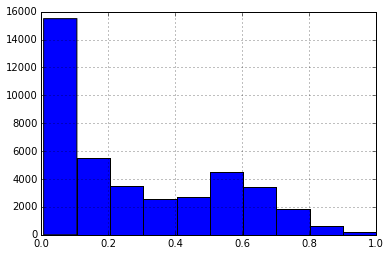

In [40]:
predicted_proba[predicted_proba['class2']>0]['class2'].hist()

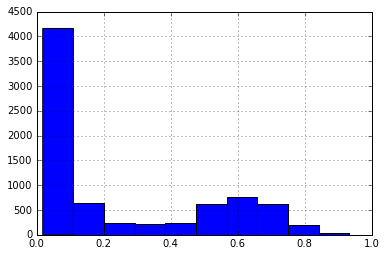

In [162]:
predicte_proba[predicte_proba['class3']>0]['class3'].hist()

In [60]:
#tomo tiempo para saber cuanto tarda fitear el estimador
start_time = time.time()

svc2.fit(X_mini,y_mini)
elapsed_time =   time.time() - start_time
print('SVC took %s seconds to run' % elapsed_time)

all_time =   time.time() - start_time
print('This cell took %s seconds to run' % all_time)

SVC took 362.8217749595642 seconds to run
This cell took 362.8219118118286 seconds to run


## Timings
* 40k samples : 360s
* 

In [75]:
start_time =  time.time()
lr.fit(X_train,y_train)
elapsed_time =   time.time() - start_time
print('Logit took %s seconds to run' % elapsed_time)

Logit took 1073.0756621360779 seconds to run


In [ ]:
#tomo tiempo para saber cuanto tarda fitear el estimador
start_time = time.time()

lr.fit(X_train,y_train)
elapsed_time =   time.time() - start_time
print('Logit took %s seconds to run' % elapsed_time)

svc.fit(X_train,y_train)
elapsed_time =   time.time() - start_time
print('Linear SVC took %s seconds to run' % elapsed_time)

all_time =   time.time() - start_time
print('This cell took %s seconds to run' % all_time)

Logit took 89.15975689888 seconds to run
Linear SVC took 804.7178750038147 seconds to run

In [ ]:
y.value_counts

# Todo
* evaluate hit_rate and 
* tune adaboost, bernoulliRBM
* xgboost
* libffm
* SVC muy lento.. speed up in AWS
